In [1]:
# import numpy as np 
# import pandas as pd 

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
# train.head()

변수 중요도

In [2]:
# https://wyatt37.tistory.com/11

In [3]:
# age / embarked / fare 결측치 처리 

# train['Age'] = train['Age'].fillna(29.69)
# test['Age'] = test['Age'].fillna(29.69) 

# train['Embarked'] = train['Embarked'].fillna('S')

# test['Fare'] = test['Fare'].fillna(8.05)

In [4]:
# name > married

# train['Name'] = train['Name'].str.split(',').str[1]
# train['Name'] = train['Name'].str.split('.').str[0]

# test['Name'] = test['Name'].str.split(',').str[1]
# test['Name'] = test['Name'].str.split('.').str[0]

# my = [' Mr', ' Mrs']
# mn = [' Miss', ' Master', ' Rev', ' Mlle']

# train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
# test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  

In [5]:
# 필요없는 변수 drop 

# train = train.drop(['Name', 'Cabin'], axis=1)
# test = test.drop(['Name', 'Cabin'], axis=1)

In [6]:
# 4 범주 이하 > 원핫
# 4 범주 이상 > 바이너리 (Why?)
# sex / embarked 원핫으로 만들기

# train = pd.get_dummies(train, columns=['Sex'])
# train = pd.get_dummies(train, columns=['Embarked'])
# train = pd.get_dummies(train, columns=['Pclass'])

Code

In [ ]:
# https://www.kaggle.com/soham1024/titanic-data-science-eda-with-meme-solution

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
# feature_kind 

# survived / sex / embarked : categorical
# pclass                    : ordinal
# age / fare                : continuous 
# sibsp / parch             : discrete (수치적 의미,소수점 표현, 측정 all X)
# ticket / cabin            : mixed  

In [12]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train.info()
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

숫자형 데이터 분포

In [ ]:
# age / fare                : continuous 
# sibsp / parch             : discrete (수치적 의미,소수점 표현, 측정 all X)
# ticket / cabin            : mixed  

In [ ]:
# https://blog.naver.com/youji4ever/221804922659

Text(0.5, 0, '')

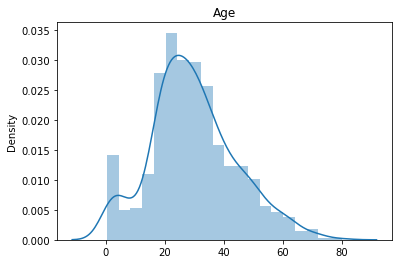

In [69]:
# Age

sns.distplot(train['Age'])
plt.title('Age')
plt.xlabel('')
# 왜도, 첨도 

Text(0.5, 0, '')

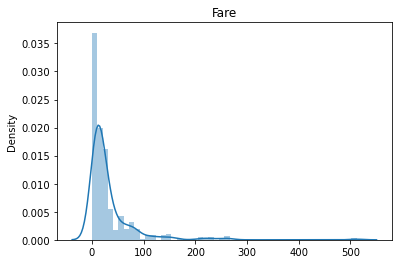

In [72]:
# fare

sns.distplot(train['Fare'])
plt.title('Fare')
plt.xlabel('')


Text(0.5, 0, '')

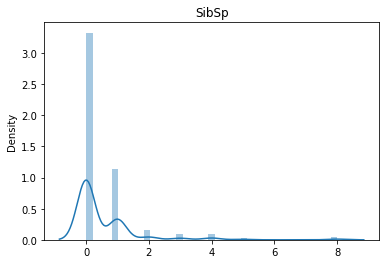

In [73]:
# sibsp

sns.distplot(train['SibSp'])
plt.title('SibSp')
plt.xlabel('')

Text(0.5, 0, '')

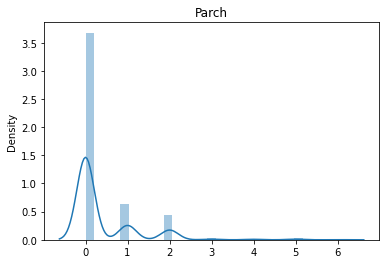

In [74]:
# parch

sns.distplot(train['Parch'])
plt.title('Parch')
plt.xlabel('')

ValueError: could not convert string to float: 'A/5 21171'

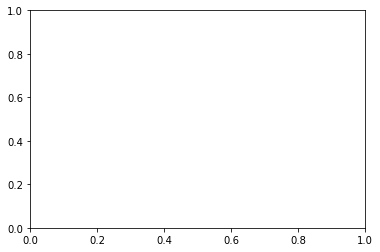

In [76]:
# ticket

sns.distplot(train['Ticket'])
plt.title('Ticket')
plt.xlabel('')

In [ ]:
# cabin

TypeError: displot() got multiple values for argument 'data'

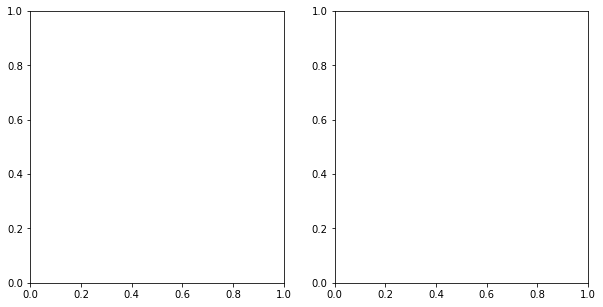

In [54]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.displot('SibSp', data = train,  ax= ax[0])
sns.displot('Parch', data = train, ax=ax[1])
plt.show()

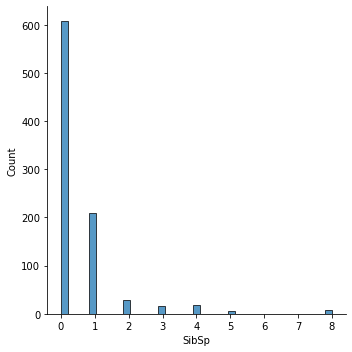

In [58]:
sns.displot(x = 'SibSp', data = train)

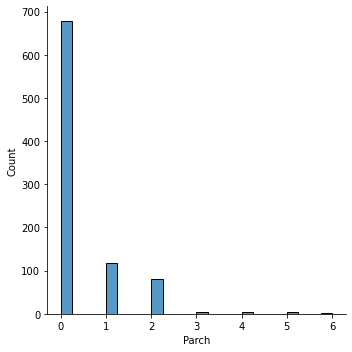

In [59]:
sns.displot(x ='Parch', data = train, binwidth=0.25)
# 대부분의 승객(>75%) 부모자녀와 동행하지 않았다. 

In [60]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


범주형 데이터 분포